In [1]:
import dynamo as dyn
import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
zebrafish_adata = dyn.sample_data.zebrafish()

adata = dyn.sample_data.zebrafish()


|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.
|-----> Downloading data to ./data/zebrafish.h5ad
|-----> Downloading data to ./data/zebrafish.h5ad


In [2]:
path = "./data/zebrafish_3d_umap.h5ad"
# dyn.pp.recipe_monocle(adata)
# dyn.tl.reduceDimension(adata, n_components=3)

# dyn.tl.dynamics(adata)
# dyn.data_io.cleanup(adata)
# adata.write_h5ad(path)
# adata = anndata.read_h5ad(path)
adata = dyn.sample_data.pancreatic_endocrinogenesis()


|-----> Downloading data to ./data/endocrinogenesis_day15.h5ad


/Users/random/opt/anaconda3/envs/dynamo-dev/lib/python3.9/site-packages/anndata/compat/__init__.py:179: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/Users/random/opt/anaconda3/envs/dynamo-dev/lib/python3.9/site-packages/anndata/compat/__init__.py:179: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [3]:
adata


AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [4]:
# for pancreas data... highly variable genes are categorical data, convert to boolean
adata.var["highly_variable_genes"] = adata.var["highly_variable_genes"] == 'True'

genes: Index(['Pgap1', 'Ankrd44', '4930558J18Rik'], dtype='object', name='index')
count    3696.000000
mean        0.157197
std         0.418021
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
dtype: float64
|-----> X shape: (3696, 3) V shape: (3696, 3)
|----->>> color vec len: 3696
|----->>> color vec len: 3696
|----->>> color vec len: 3696


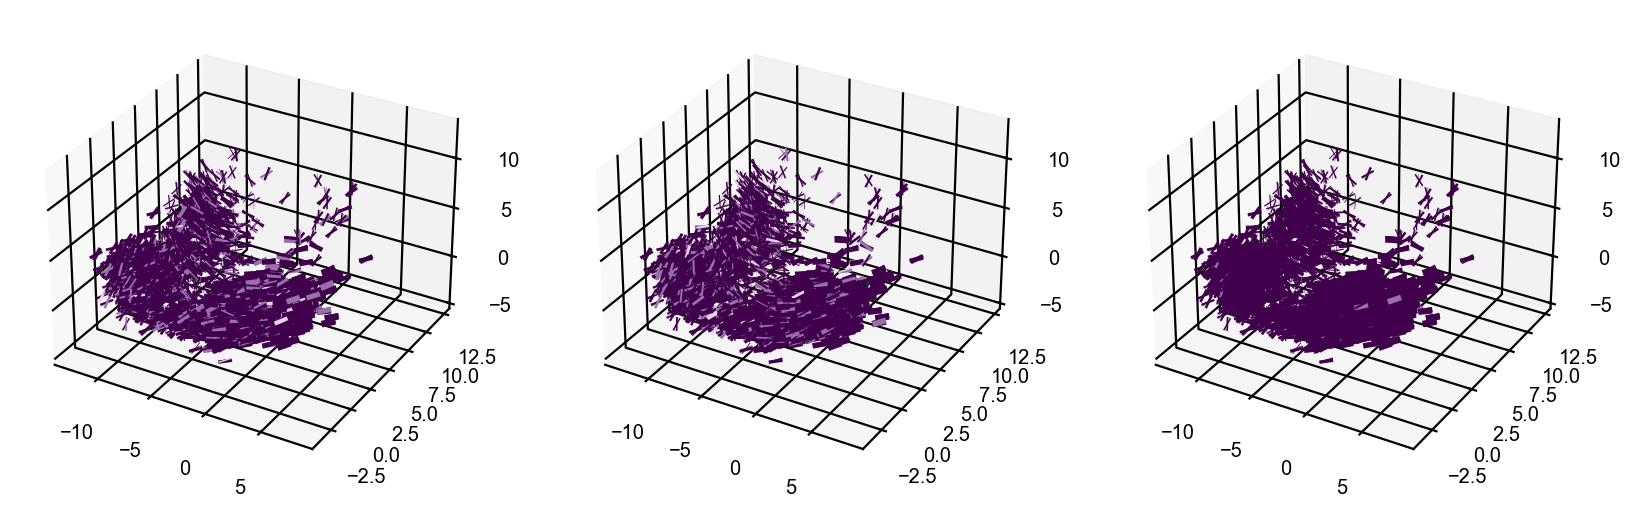

In [8]:
dyn.dynamo_logger.main_set_level(dyn.dynamo_logger.LoggerManager.DEBUG)
from matplotlib import cm

quiver_3d_kwargs = {
    "zorder": 3,
    "length": 2,
    "linewidth": 5,
    "arrow_length_ratio": 5,
    "norm": cm.colors.Normalize(),  # for color
    "cmap": cm.PRGn,
    # "cmap": cm.Spectral,
}
genes = adata[:, adata.var["highly_variable_genes"]].var_names[20:23]
print("genes:", genes)
print(pd.Series(adata[:, genes[1]].X.toarray().flatten()).describe())
dyn.pl.cell_wise_vectors_3d(
    adata,
    X=adata.obsm["X_pca"][:, 4:7],
    V=adata.obsm["X_pca"],
    color=genes,
    save_show_or_return="show",
    figsize=(10, 10),
    quiver_3d_kwargs=quiver_3d_kwargs,
)


In [6]:
import matplotlib

# matplotlib.pyplot.switch_backend("WXAgg")
print(matplotlib.get_backend())


module://matplotlib_inline.backend_inline


In [7]:
# dyn.pl.cell_wise_vectors(adata, basis="umap", projection="3d", vector="X", save_show_or_return="show")
# %matplotlib inline
# plt.ion()
plt.clf()
dyn.pl.cell_wise_vectors(
    adata,
    basis="umap",
    projection="3d",
    vector="X",
    save_show_or_return="show",
    show_colorbar=False,
    despline=False,
    show_legend=False,
    use_smoothed=False,
)


IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 600x400 with 0 Axes>